In [19]:
import numpy as np
import torch
from torch.utils import data
import matplotlib.pyplot as plt


In [2]:
%run DataPre-processing.ipynb #importing other jupyter notebook file

In [3]:
features = p.x_tensor_circle_train_df
features = torch.tensor(features, dtype =torch.float32)
#print(features.type())

labels = p.y1_tensor_circle_train_df
labels = torch.tensor(labels, dtype = torch.float32)
#print(labels.type())


C:\Users\RajanPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
C:\Users\RajanPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [4]:
#reading the dataset
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [5]:
next(iter(data_iter))

[tensor([[ -0.9854,  14.9139, -10.9796,  -9.1294, -34.5973,  64.8398],
         [ -6.3319,  49.6190, -12.8501,  53.7817,  -8.0289,  40.0503],
         [ 18.0741, -14.0846,  18.3586, -14.4750,   5.9584, -80.6105],
         [ 30.4099, -94.3600,  19.9060,  27.8556, -26.0179, -74.6651],
         [-27.7124,   2.8420,  -2.5695,  24.1751,  34.4162,  10.6311],
         [  5.0948,  19.0563, -18.3713,  -5.8266, -59.4810,  11.4589],
         [  0.7754, -58.1173,  -2.8958, -58.6961, -29.3943, -40.8390],
         [-42.1313,  50.4642,  11.3294,  43.9042,  31.9934, -46.9595],
         [ 20.9143,   0.1442, -96.5093, -43.5541, -95.5116, -45.2525],
         [110.0370, -37.8835, -27.9912, -18.2970, 100.4496, -64.6209]]),
 tensor([[-47.2353],
         [-13.2751],
         [-20.0315],
         [ 19.9443],
         [  5.5637],
         [-28.6066],
         [ -5.0852],
         [-22.6201],
         [-41.3115],
         [ 41.0258]])]

In [11]:
#defining the model

from torch import nn
net = nn.Sequential(nn.Linear(6, 1))

In [12]:
#initializing the model parameters
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0).type()


'torch.FloatTensor'

In [13]:
#defining the loss function
loss = nn.MSELoss()

In [14]:
#defining the optimization algorithm
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [21]:
num_epochs =5
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X.to(torch.float32)), y)
        l = torch.tensor(l, dtype = torch.float32)
        l.requires_grad =True
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

C:\Users\RajanPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


epoch 1, loss 819.454163
epoch 2, loss 819.454163
epoch 3, loss 819.454163
epoch 4, loss 819.454163
epoch 5, loss 819.454163


In [17]:
#To print the parameters of trained model
for name, param in net.state_dict().items():
    print(name, param.size(), param)

0.weight torch.Size([1, 6]) tensor([[ 0.0036, -0.0164,  0.0052, -0.0084,  0.0011, -0.0037]])
0.bias torch.Size([1]) tensor([0.])


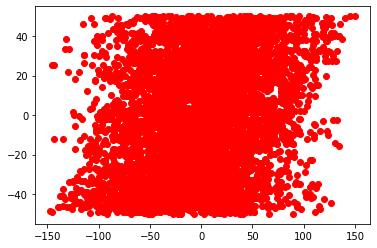

In [20]:
# Plot
predicted = net(X).detach().numpy()

plt.plot(features, labels, 'ro')
#plt.plot(X_numpy, predicted, 'b')
plt.show()